In [2]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
df=pd.read_csv("student-mat.csv",sep=',')
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [3]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]

In [4]:
dfs.head()

schoolsup famsup paid activities nursery higher internet romantic
0       yes     no   no         no     yes    yes       no       no
1        no    yes   no         no      no    yes      yes       no
2       yes     no  yes         no     yes    yes      yes       no
3        no    yes  yes        yes     yes    yes      yes      yes
4        no    yes  yes         no     yes    yes       no       no

In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolsup   395 non-null    object
 1   famsup      395 non-null    object
 2   paid        395 non-null    object
 3   activities  395 non-null    object
 4   nursery     395 non-null    object
 5   higher      395 non-null    object
 6   internet    395 non-null    object
 7   romantic    395 non-null    object
dtypes: object(8)
memory usage: 24.8+ KB


In [7]:
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)

In [8]:
dfs.head()

schoolsup  famsup  paid  activities  nursery  higher  internet  romantic
0          1       0     0           0        1       1         0         0
1          0       1     0           0        0       1         1         0
2          1       0     1           0        1       1         1         0
3          0       1     1           1        1       1         1         1
4          0       1     1           0        1       1         0         0

In [9]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   395 non-null    int64
 1   famsup      395 non-null    int64
 2   paid        395 non-null    int64
 3   activities  395 non-null    int64
 4   nursery     395 non-null    int64
 5   higher      395 non-null    int64
 6   internet    395 non-null    int64
 7   romantic    395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB


In [10]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [11]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [12]:
from scipy.spatial import distance
dist_matrix=distance.cdist(n,m)

In [13]:
dist_matrix.shape

(395, 395)

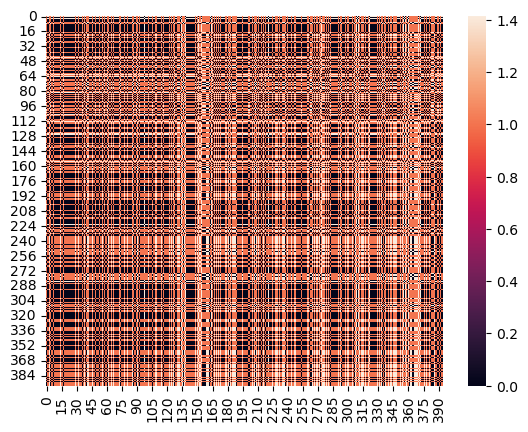

In [14]:
sbs.heatmap(dist_matrix)
plt.show()

In [15]:
numeric=df[['age','Medu','Fedu','traveltime','studytime','failures']]

In [16]:
numeric.head()

age  Medu  Fedu  traveltime  studytime  failures
0   18     4     4           2          2         0
1   17     1     1           1          2         0
2   15     1     1           1          2         3
3   15     4     2           1          3         0
4   16     3     3           1          2         0

In [17]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [18]:
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [19]:
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [20]:
from scipy.spatial import distance
dist_matrix=distance.cdist(num1,num2)

In [21]:
dist_matrix.shape

(395, 395)

<Axes: >

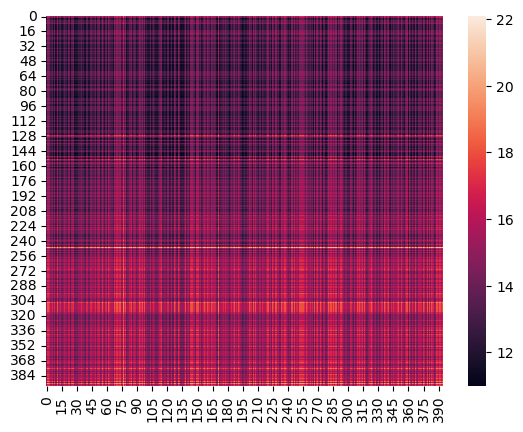

In [22]:
sbs.heatmap(dist_matrix)

In [23]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [25]:
nominal['guardian']=lb.fit_transform(nominal['guardian'])

In [26]:
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])

In [27]:
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])

In [28]:
nominal['reason']=lb.fit_transform(nominal['reason'])

In [29]:
nominal.head()

Mjob  Fjob  reason  guardian
0     1     4       0         1
1     1     2       0         0
2     1     2       2         1
3     0     3       1         1
4     2     2       1         0

In [30]:
nom1=np.array(nominal)
nom1.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [31]:
nom2=np.array(nominal)
nom2.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [32]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nom1,nom2)

<Axes: >

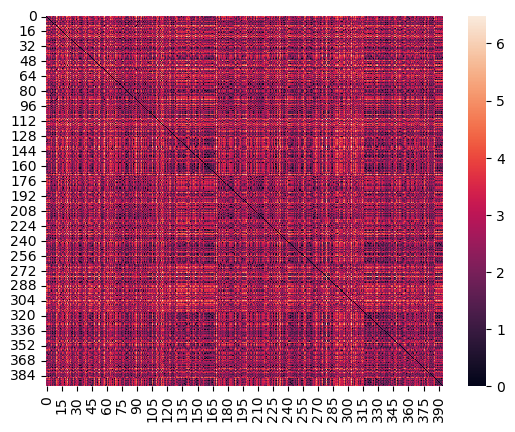

In [33]:
sbs.heatmap(dist_matrix)

In [34]:
dist_matrix.shape

(395, 395)